In [164]:
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Results

In [1]:
results = pd.DataFrame(columns=['Model', 'mse', 'mae', 'rmse', 'mape', 'r2']).dropna()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


def appendError(model, testy, y_pred):
    # model_name = str(type(model).__name__)
    mse = mean_squared_error(testy, y_pred)
    mae = mean_absolute_error(testy, y_pred)
    rmse = root_mean_squared_error(testy, y_pred)
    mape = mean_absolute_percentage_error(testy, y_pred)
    r2 = r2_score(testy, y_pred)
    return pd.DataFrame([{
        'Model': model,
        'mse': mse, 
        'mae': mae, 
        'rmse': rmse, 
        'mape': mape, 
        'r2': r2
    }])

NameError: name 'pd' is not defined

# Start

In [145]:
data = pd.read_csv("data/set.csv").drop(columns=['DateTime'])
data

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetimestamp
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,299706
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,299707
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,299708
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,299709
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,299710
...,...,...,...,...,...,...,...,...,...
8440,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,309058
8441,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,309059
8442,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,309060
8443,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,309061


In [154]:
X = data.drop(columns=['PT08.S1(CO)'])
y = data['PT08.S1(CO)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [1]:
bst = XGBRegressor()
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
results = pd.concat([results, appendError("xgb ns", y_test, preds)])

NameError: name 'XGBRegressor' is not defined

# XGB Scaled

In [156]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.2)

In [149]:
bst = XGBRegressor()
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
results = pd.concat([results, appendError("xgb sS", y_test, preds)])

In [150]:
results

,Model,mse,mae,rmse,mape,r2
0,xgb ns,1065.011139,24.356884,32.634508,0.021841,0.973524
0,xgb sS,1036.298371,24.347190,32.191589,0.021849,0.972620


# More goodies?

In [161]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.2)
specs = ["dart", "exact", 5, 3, 0.5]
bst = XGBRegressor(booster=specs[0], tree_method=specs[1], max_depth=specs[2], gamma=specs[3])
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
results = pd.concat([results, appendError("xgb"+str(specs), y_test, preds)])
# appendError("xgb"+str(specs), y_test, preds)
results

,Model,mse,mae,rmse,mape,r2
0,xgb ns,1065.011139,24.356884,32.634508,0.021841,0.973524
0,xgb sS,1036.298371,24.347190,32.191589,0.021849,0.972620
0,"xgb['dart', 'exact', 5, 3, 0.5]",909.267715,23.310737,30.154066,0.021026,0.975976
0,"xgb['dart', 'exact', 5, 3, 0.5]",958.902445,23.083686,30.966150,0.020891,0.972741
0,"xgb['dart', 'exact', 5, 3, 0.5]",889.379096,22.866344,29.822460,0.020816,0.974897
0,"xgb['dart', 'exact', 5, 3, 0.5]",967.046549,23.375069,31.097372,0.021065,0.974999
0,"xgb['dart', 'exact', 5, 3, 0.5]",1027.435249,24.041710,32.053631,0.021679,0.972429
0,"xgb['dart', 'exact', 5, 3, 0.5]",963.393414,23.059997,31.038579,0.020871,0.973600
0,"xgb['dart', 'exact', 5, 3, 0.5]",1018.147023,24.162822,31.908416,0.021623,0.972562
0,"xgb['dart', 'exact', 5, 3, 0.5]",877.568603,22.399886,29.623784,0.020212,0.975186


In [173]:
bst.save_model("good_parry.ubj")

# Visual

In [177]:
def plotDiff(preds):
    plt.figure(figsize=(28, 8))
    plt.scatter(range(len(preds)), preds, color='red', marker='.', s=1)
    plt.scatter(range(len(preds)), y_test, color='blue', marker='.', s=1)
    for i in range(len(preds)):
        plt.plot([i, i], [preds[i], y_test.iloc[i]], color='green', linewidth=0.5)
    plt.xlabel('Index')
    plt.ylabel('y')
    plt.title('Plot of y_pred with Index as X-axis')
    plt.savefig('plot.png', dpi=300, bbox_inches='tight')
    plt.show()

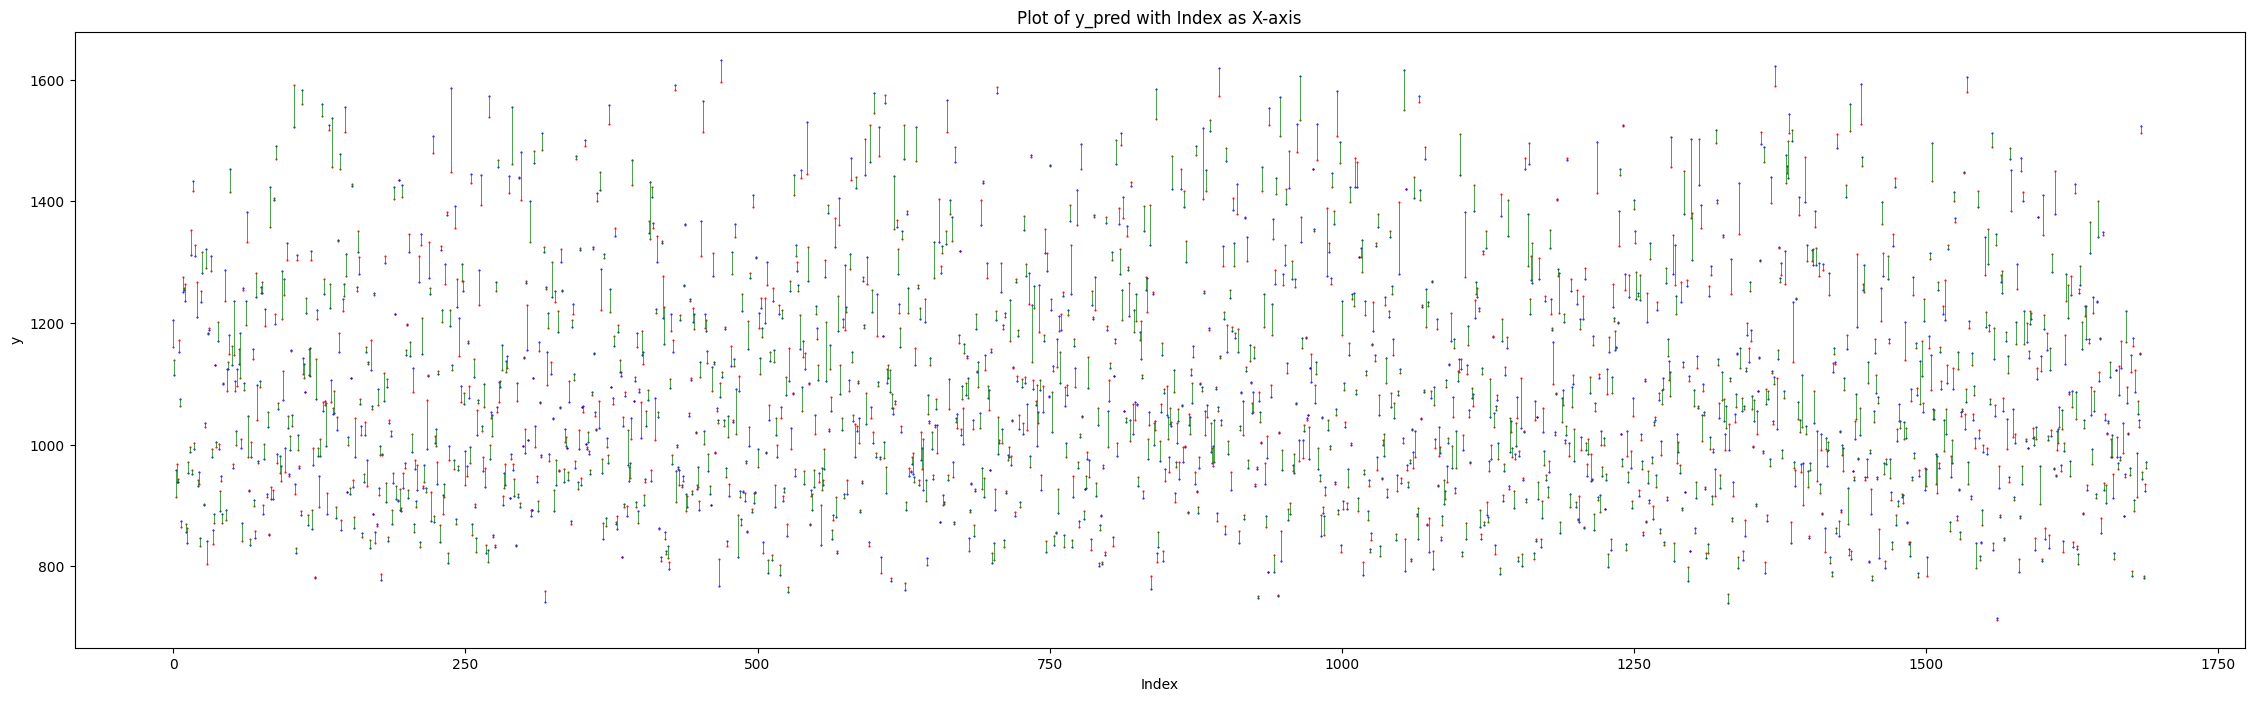

In [178]:
plotDiff(preds)